<h1>Load Data</h1>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./coffee_shop_revenue.csv")

y = data["Daily_Revenue"]

X = data.drop("Daily_Revenue", axis=1)

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)
print(f"Rows removed: {rows_removed}")

Rows removed: 0


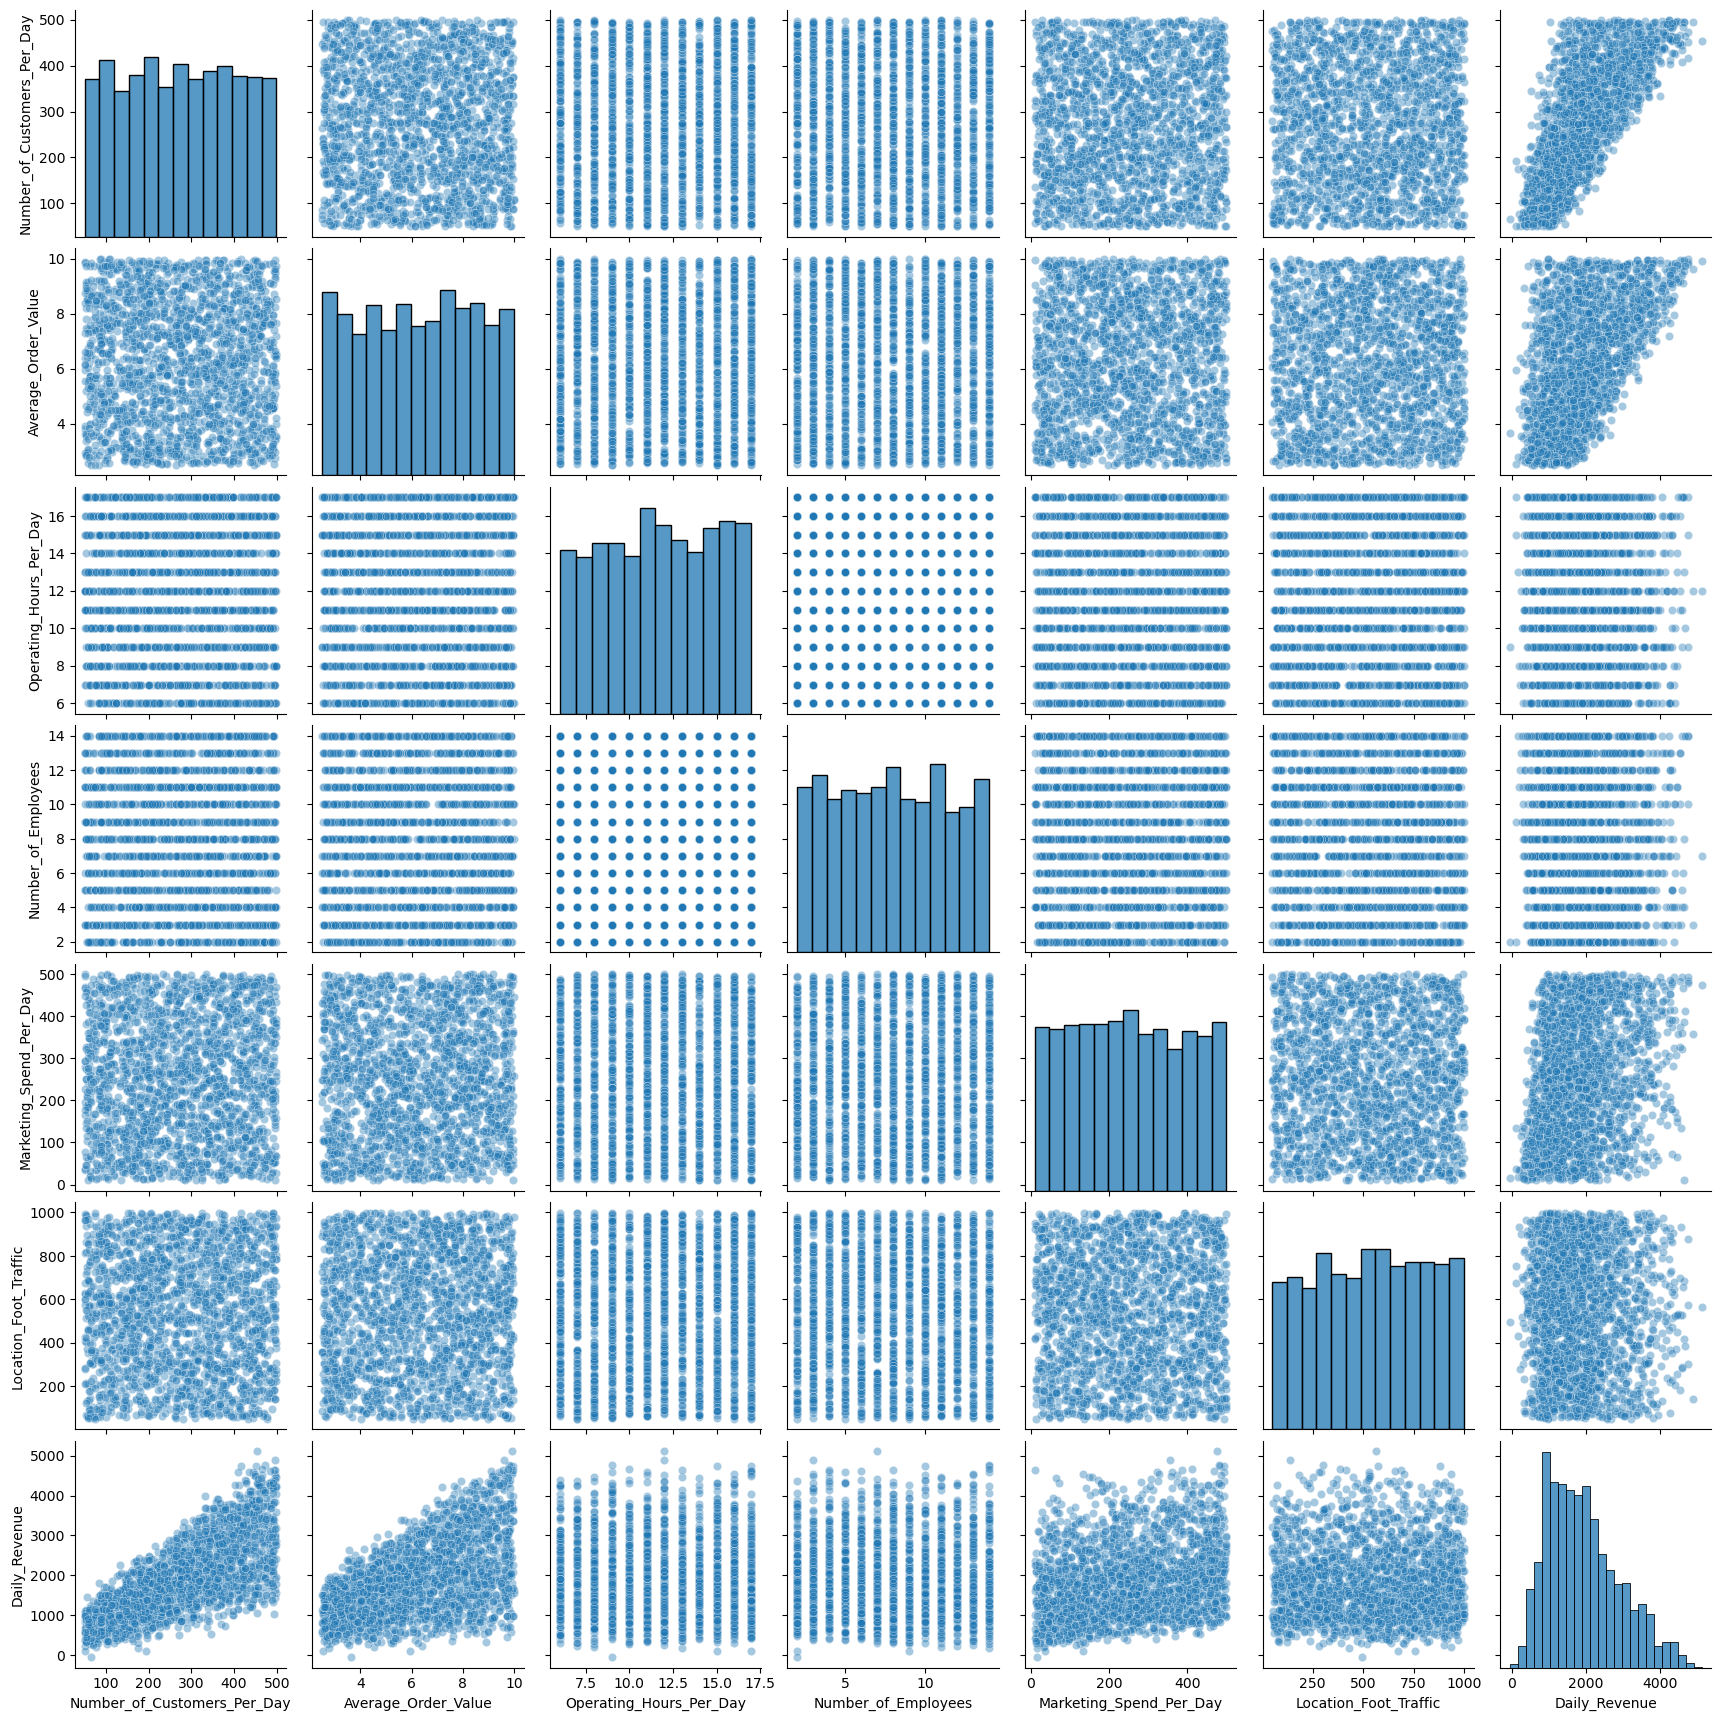

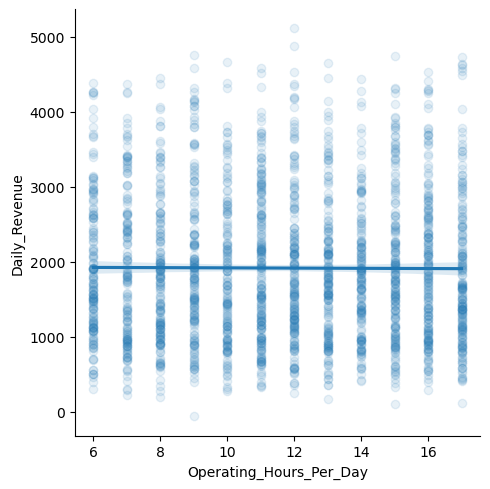

In [18]:
sns.pairplot(data, kind='scatter', plot_kws={'alpha': 0.4})

sns.lmplot(x="Operating_Hours_Per_Day", y="Daily_Revenue", data = data, scatter_kws={'alpha': 0.1})